In [1]:
from pennyfabone import SingleFlowFourStations, PUSH_PRODUCTION, PULL_PRODUCTION
import matplotlib.pyplot as plt

In [2]:
CT_0=2#工作站0 CT
CT_1=2#工作站1 CT
CT_2=6#工作站2 CT
CT_3=2#工作站3 CT
total_hours=40#總時長
WIP_max=20#WIP最大上限
targets=15#目標產出
start_push=0#因爲push是空了就補料，所以t=0就會開始投料（此項為常數）
start_pull=4#拉式生產什麼時候開始往第一個工作站(工作站0)投料

In [3]:
#推式生產
print('PUSH')
finish_push=[]
lead_time_push=[]
for i in range(5, 6):
  fab = SingleFlowFourStations(cts=[CT_0,CT_1,CT_2,CT_3],hours=total_hours,threshold=i,target=targets,mode=PUSH_PRODUCTION) 
  finish,LT= fab.run_all()
  finish_push.append(finish)
  lead_time_push.append(LT)

PUSH
Threshold: 5
:0: s0:1, s1:0, s2:0, s3:0, finish:0, total wip:1
:1: s0:0, s1:1, s2:0, s3:0, finish:0, total wip:1
:2: s0:1, s1:1, s2:0, s3:0, finish:0, total wip:2
:3: s0:0, s1:1, s2:1, s3:0, finish:0, total wip:2
:4: s0:1, s1:1, s2:1, s3:0, finish:0, total wip:3
:5: s0:0, s1:1, s2:2, s3:0, finish:0, total wip:3
:6: s0:1, s1:1, s2:2, s3:0, finish:0, total wip:4
:7: s0:0, s1:1, s2:3, s3:0, finish:0, total wip:4
:8: s0:1, s1:1, s2:3, s3:0, finish:0, total wip:5
Exception sent
:9: s0:0, s1:1, s2:4, s3:0, finish:0, total wip:5
Exception sent
:10: s0:0, s1:1, s2:3, s3:1, finish:0, total wip:5
Exception sent
:11: s0:0, s1:0, s2:4, s3:1, finish:0, total wip:5
Exception sent
:12: s0:0, s1:0, s2:4, s3:0, finish:1, total wip:4
:13: s0:1, s1:0, s2:4, s3:0, finish:1, total wip:5
Exception sent
:14: s0:0, s1:1, s2:4, s3:0, finish:1, total wip:5
Exception sent
:15: s0:0, s1:1, s2:4, s3:0, finish:1, total wip:5
Exception sent
:16: s0:0, s1:0, s2:4, s3:1, finish:1, total wip:5
Exception sent
:17: 

In [5]:
print(lead_time_push)

[0]


In [7]:
#拉式生產
print('PULL:')
finish_pull=[]
lead_time_pull=[]
for i in range(5, WIP_max+1):
  fab = SingleFlowFourStations([CT_0,CT_1,CT_2,CT_3], total_hours,i,targets,PULL_PRODUCTION,4)
  finish,LT= fab.run_all()
  finish_pull.append(finish)
  lead_time_pull.append(LT)
  #fab.exception_message()

PULL:
Threshold: 5
:0: s0:0, s1:0, s2:0, s3:0, finish:0, total wip:0
:1: s0:0, s1:0, s2:0, s3:0, finish:0, total wip:0
:2: s0:0, s1:0, s2:0, s3:0, finish:0, total wip:0
:3: s0:0, s1:0, s2:0, s3:0, finish:0, total wip:0
:4: s0:1, s1:0, s2:0, s3:0, finish:0, total wip:1
:5: s0:0, s1:1, s2:0, s3:0, finish:0, total wip:1
:6: s0:0, s1:1, s2:0, s3:0, finish:0, total wip:1
:7: s0:0, s1:0, s2:1, s3:0, finish:0, total wip:1
:8: s0:0, s1:0, s2:1, s3:0, finish:0, total wip:1
:9: s0:0, s1:0, s2:1, s3:0, finish:0, total wip:1
:10: s0:1, s1:0, s2:1, s3:0, finish:0, total wip:2
:11: s0:0, s1:1, s2:1, s3:0, finish:0, total wip:2
:12: s0:0, s1:1, s2:1, s3:0, finish:0, total wip:2
:13: s0:0, s1:0, s2:2, s3:0, finish:0, total wip:2
:14: s0:0, s1:0, s2:1, s3:1, finish:0, total wip:2
:15: s0:0, s1:0, s2:1, s3:1, finish:0, total wip:2
:16: s0:1, s1:0, s2:1, s3:0, finish:1, total wip:2
:17: s0:0, s1:1, s2:1, s3:0, finish:1, total wip:2
:18: s0:0, s1:1, s2:1, s3:0, finish:1, total wip:2
:19: s0:0, s1:0, s2:2,

In [8]:
print(lead_time_pull)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

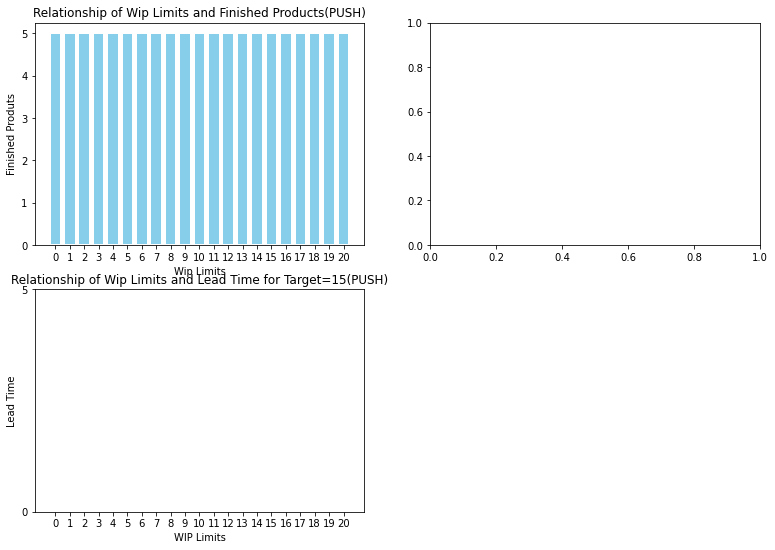

In [9]:
#定義畫圖函式
def plot_result(finish_list_push,lead_time_list_push,finish_list_pull,lead_time_list_pull,round,targets):
  labels =[]
  x1=[]
  x2=[]
  x3=[]
  x4=[]
  target=targets
  for i in range(round):
    labels.append(str(i))
    x1.append(i)
    x2.append(i)
    x3.append(i)
    x4.append(i)

  fig = plt.figure(figsize=(13,9))
  y1 = finish_list_push
  plt.subplot(2,2,1)
  plt.bar(x1, y1, color='skyblue', linewidth=2, edgecolor='white', tick_label=labels)
  plt.xlabel('Wip Limits')
  plt.ylabel('Finished Produts')
  plt.title('Relationship of Wip Limits and Finished Products(PUSH)')

  y2 = lead_time_list_push
  plt.subplot(2,2,3)
  plt.bar(x2, y2, color='skyblue', linewidth=2, edgecolor='white', tick_label=labels)
  plt.xlabel('WIP Limits')
  plt.ylabel('Lead Time')
  y_major_locator=plt.MultipleLocator(5)
  ax=plt.gca()
  ax.yaxis.set_major_locator(y_major_locator)#把y軸的主刻度設置为6的倍数
  max = y2[len(y2)-1]
  plt.ylim(0,max+5)
  plt.title('Relationship of Wip Limits and Lead Time for Target='+str(target)+'(PUSH)')

  y3 = finish_list_pull
  plt.subplot(2,2,2)
  plt.bar(x3, y3, color='yellowgreen', linewidth=2, edgecolor='white', tick_label=labels)
  plt.xlabel('Wip Limits')
  plt.ylabel('Finished Produts')
  plt.title('Relationship of Wip Limits and Finished Products(PULL)')

  y4 = lead_time_list_pull
  plt.subplot(2,2,4)
  plt.bar(x4, y4, color='yellowgreen', linewidth=2, edgecolor='white', tick_label=labels)
  plt.xlabel('WIP Limits')
  plt.ylabel('Lead Time')
  y_major_locator=plt.MultipleLocator(5)
  ax=plt.gca()
  ax.yaxis.set_major_locator(y_major_locator)#把y軸的主刻度設置为6的倍数
  max = y4[len(y4)-1]
  plt.ylim(0,max+5)
  plt.title('Relationship of Wip Limits and Lead Time for Target='+str(target)+'(PULL)')

  #調整每張圖的間距
  plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.35)
  plt.show()

#畫出結果
plot_result(finish_push,lead_time_push,finish_pull,lead_time_pull,WIP_max+1,targets) 